<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_GENAP_2023/blob/main/Week8_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTS

Pada program ini dibuat untuk melihat bagaimana nilai PSNR setelah dilakukan koreksi gama dan penajaman pada gambar tumor otak

Suber data(https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

Anggota Kelompok :

1. Arya Wahjoe Setiawan (03)
2. Noorr Afiad (12)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# melakukan import library
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import glob
from math import log10, sqrt

In [ ]:
def convolution2d(image, kernel, stride, padding):
# Menambahkan padding
  image = np.pad(image, padding, mode='constant', constant_values=0)
  
# Mengambil gambar dengan input lebar dan tinggi termasuk penambahan padding
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

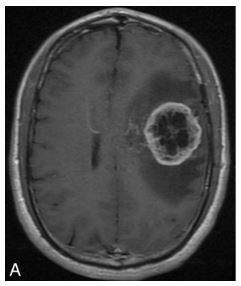

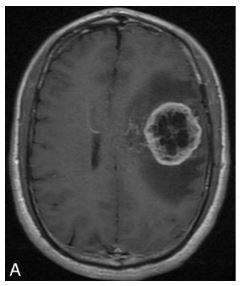

In [ ]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 8/uts/Y89.JPG')
# Mengubah Gambar Normal mejadi Grayscale
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img);
cv2_imshow(img_gray);

Gamma Correction pada citra 
----------------------------------
Masukkan Nilai Gamma: 2.0


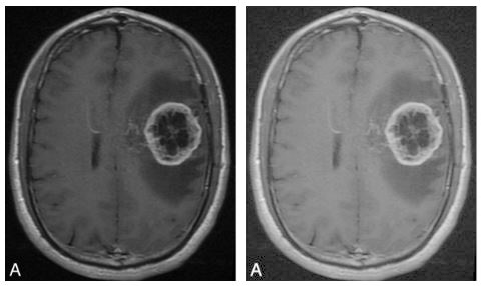

In [ ]:
# pada bagian ini gambar akan dilakukan koreksi nilai gama dengan mengimputkan nilai gama
print('Gamma Correction pada citra ')
print('----------------------------------')
try:
  # Saran untuk nilai gamma correction adalah 2.2 karena pada laptop nilai gamma yang tepat adalah 2.2
  # Float karena nilai yang diinput berbentuk desimal
  gamma = float(input('Masukkan Nilai Gamma: '))
  # Value error maksudnya jika satuan yang dimasukkan berbeda dari yang seharusnya maka akan keluar print error dibawah
except ValueError:
  print('Error, Not a Number')  

original = cv.cvtColor(img_gray,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)
# y = tinggi, x = lebar, c = warna
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus koreksi gamma = 255 x (I/255)^1/gamma
      # Pow untuk memproses perhitungan perpangkatan 
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

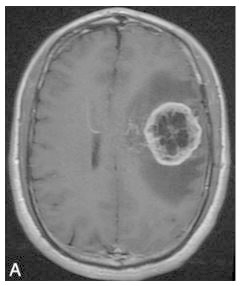

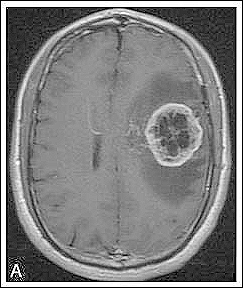

In [ ]:
# image sharpen
gamma_image1 = cv.cvtColor(gamma_image,cv.COLOR_RGB2GRAY)
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# apply gambar yang telah dilakukan gamma correction kemudian dilakukan sharpen
cv2_imshow(gamma_image)
cv2_imshow(convolution2d(gamma_image1,kernal_sharpen,1,2))

# menduplikat gambar
img4=convolution2d(gamma_image1,kernal_sharpen,1,2)

Nilai PSNR dengan pembading antara gambar gray scale setelah dilakukan gamma correction dan dipertajam adalah  10.451534340879995 (dB)


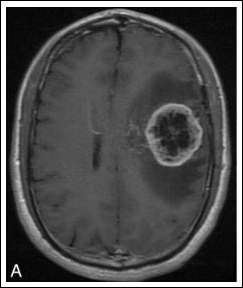

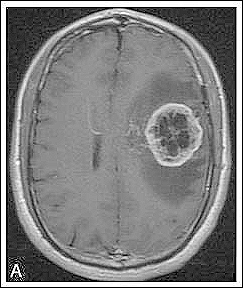

In [ ]:
# memberi padding pada gambar agar ukuran gambar awal sama seperti gambar setelah dilakukan image processing
color = [0,0,0] 
top, bottom, left, right = [1]*4
img_with_border = cv.copyMakeBorder(img_gray, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)


original = img_with_border
# Membuat fungsi PSNR
def PSNR(original, compressed):
  # Rumus PSNR = original (i,j) - denoise (i,j)^2
  mse = np.mean((original - compressed) ** 2)
  # MSE == 0 maksudnya jika tidak ada suara di sinyal maka akan return 100 .
  if(mse == 0):
    return 100
  max_pixel = 255.0
  # Rumus psnr = 20 Log10 (L-1/RMSE)
  psnr = 20* log10(max_pixel / sqrt(mse))
  return psnr

compressed = img4
# melakukan penghitungan nilai PSNR dengan menggunakan fungsi yang telah dibuat
psnr = PSNR(original, compressed)

print('Nilai PSNR dengan pembanding antara gambar gray scale setelah dilakukan gamma correction dan dipertajam adalah ', psnr, '(dB)')
cv2_imshow(original)
cv2_imshow(img4)

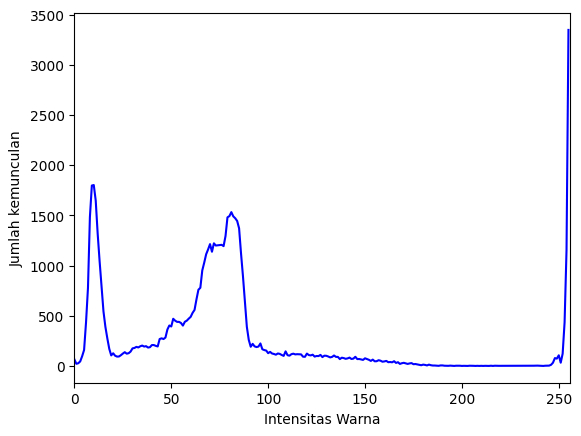

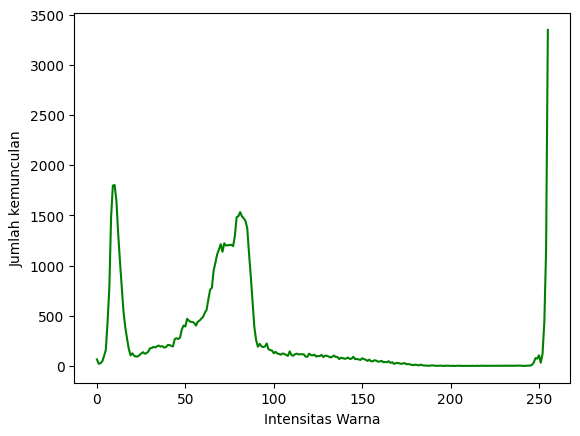

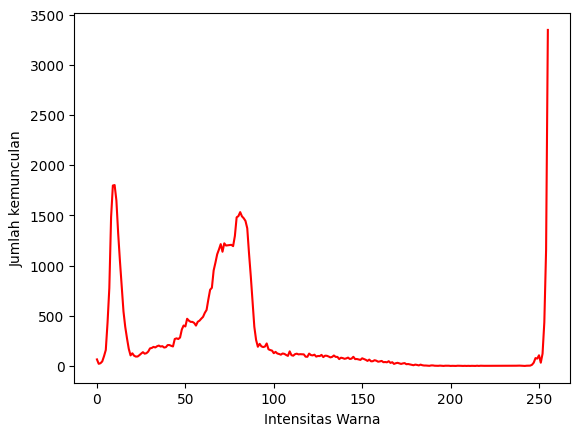

In [ ]:
#Membuat histogram image
colors = ("b","g","r")
# Channel ID (0=Blue, 1=Green, 2=Red)
channel_ids = (0, 1, 2)

# Membatasi Range Sumbu X
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()